<a href="https://colab.research.google.com/github/NateLeMonnier/HeartHealthRegressionModel/blob/main/HeartHealthRegressionModel_NathanLeMonnier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nathan LeMonnier <br>
Data Wrangling <br>
Professor Kogan <br>
Heart Health Regression Model <br>
17-Nov-2024

# DS 2500 Source and Exploratory Data Analysis

One of the most common mistakes when examining data is claiming causation when there is none. For example, when there is a strong, purely coincidental correlation, it is easy to claim that as the data aligns, there must be a causation. However, it is not true.

By using Hill's Framework, a series of questions that can identify if two variables are a correlation or a causation, it is possible to form a conclusion that is much more likely.

In the article "Heart Health and Changing" published by the *National Institute of Aging* (NIH), there exists one of these hopeful claims of causation. Written into this article is the **argument:** “Aging causes changes in the heart and blood vessels”, which in turn “increase a person's risk of heart disease and related health problems” (NIH).

Below, I will use Hill's Framework, a basic EDA, and multiple logistic regression models in an effort to find a more likely suspect than the NIH solely claimed "aging".


## Source Analysis

# 1. Identify
*What argument does the article make? What is the primary causal mechanism being claimed?* <br>
**Argument:** "Aging causes changes in the heart and blood vessels", which in turn "increase a person's risk of heart disease and related health problems". <br>
**Primary Causal Mechanism being Claimed:** Aging affects the function and overall physical health of the heart, such as decreasing heart beat speed during physical activity, increasing the thickness of heart walls, and other similar effects. These, in turn, increase the risk of heart disease and health problems.

# 2. Critique
*Offer a critique of the causal argument proposed by the articles using Hill’s framework, threats to internal validity, alternative causal explanations (are they missing intervening variables? confounding variables?).* <br> <br>
**Hill's Framework:** <br>
- *Strength - How big is the effect you are measuring? (Large effects imply causality, but small effects also can):* While there is no concrete quantitative, data, the words used like “may” or “could increase a person’s risk" imply a small effect.
- *Consistency - Can the effect be replicated? (Causal effect should be reproducible):* Yes, the data and explanation are from various aging people, meaning that the effect was replicated in multiple mediums.
- *Specificity - Can association be pinpointed? (No other mechanisms should plausibly explain):* No, association cannot be pinpointed, as there are other potential causal mechanisms that could explain the effect, such as extended exposure to heart damaging chemicals over the course of life, overall “wearing out” of the heart over time, or increase in the chance for problems over the massive amount of time.
- *Temporality - Do the causes come before effects? (No time traveling):* Not necessarily. These heart issues can occur in younger people as well.
- *Gradient - Do stronger/weaker treatments cause greater/lesser effects? (Same as covariation):* Again, not necessarily. While heart health can potentially be improved with activities such as physical exercise, a healthy diet, or a healthy weight, they are not guaranteed to lower the effects. Stronger/weaker treatments do not inherently cause greater/lesser effects.
- *Plausibility - Does the causal mechanism itself make sense?:* Somewhat. While it is logical that age would cause small changes to the heart, it is not clear that age on its own would lead to heart issues.
- *Coherence - Is the casual mechanism compatible with other evidence?:* Yes, other evidence backs the causal mechanism. With a simple Google search, I found a multitude of articles proposing the same claim.
- *Experiment - Can experiments reproduce the effect?:* No, simulating old age is not the same as actually being old.
- *Analogy - Is the causal mechanism similar to other established mechanisms?:* Yes, it has been known that age (in all animals) causes changes to the body that lead to death (dying of old age). <br> <br>

**What is missing from the original causal argument?** <br>
I believe that old age does not inherently cause an increase in heart health risk. There is more likely a "Mediation" causal relationship, with old age causing various other effects (increase in metabolism, decreased heart strength, etc..) which in turn cause an increase in heart health risk. In this situation, there would be multiple *intervening variables*: Cholesterol, resting heart pressure, blood sugar, and others.

# 3. Propose
*Propose an alternative causal mechanism and use Hill's framework to make a case for how this alternative could be a better explanation for the observed relationship. What kinds of data/variables would illustrate this alternative relationship?* <br> <br>
*My proposed alternative causal mechanism is as follows:* An increased cholesterol, fasting blood sugar, resting heart pressure, and other health factors—combined with a lower amount of physical activity inherent to getting old—causes an increase in risk for heart disease and other issues. <br> <br>
**Hill's Framework:** <br>
- *Strength - How big is the effect you are measuring? (Large effects imply causality, but small effects also can):* There are various journals reporting the effects of my proposed alternative variables. For example, high cholesterol creates fatty deposits in blood vessels that impair blood flow, which increase heart health risk.
- *Consistency - Can the effect be replicated? (Causal effect should be reproducible):* Yes, the data and explanation are from many different older people, meaning that the effect was replicated in various mediums. Same as before.
- *Specificity - Can association be pinpointed? (No other mechanisms should plausibly explain):* Again, no. However, it is more likely that high cholesterol, fasting blood sugar, and low exercise cause heart issues than old age as they are heavily researched and proved factors.
- *Temporality - Do the causes come before effects? (No time traveling):* More so than old age. High cholesterol, fasting blood sugar, and decreased exercise have been shown to cause heart issues in all types of people.
- *Gradient - Do stronger/weaker treatments cause greater/lesser effects? (Same as covariation):* It has been shown that lower cholesterol decreases heart disease risk. Physical exercise and lower blood sugar have also been shown to decrease overall risk.
- *Plausibility - Does the causal mechanism itself make sense?:* It does. High cholesterol, high blood sugar, and low exercise are some of the most logical causes of heart issues. If your heart needs to work harder through an increase in cholesterol clogging up your blood vessels, it is logical that issues may arise.
- *Coherence - Is the casual mechanism compatible with other evidence?:* Yes, other evidence backs the causal mechanism.
- *Experiment - Can experiments reproduce the effect?:* High cholesterol in pigs has been shown to lead to heart disease, so yes.
- *Analogy - Is the causal mechanism similar to other established mechanisms?:* Yes, there are various factors that can lead to heart disease risk. <br> <br>

**What variables would illustrate this alternative relationship?** <br>
The variables that I will use to illustrate this alternative relationship are: resting blood pressure, fasting blood sugar, cholesterol, maximum heart rate achieved, and others. <br> <br>

**What metrics would you employ to assess the superior explanation?** <br>
My approach to assessing the "superior" explanation will be an exploratory data analysis and multiple logistic regression models. As of now, I cannot prove that my explanation is stronger. However, after manipulating the data to demonstrate both the original and my explanations, I believe that it will be clear that the alternative causal explanation is better through the R-Squared value of both models.

# 4. Analyze
*Compare two regression models*

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

## 1. Formulate your questions
<br>
Question: Is there stronger evidence to support an alternative causation for heart health risk than simply old age?


## 2. Read in your data



To perform an EDA with my selected dataset, I first need to construct two logistic regression models: one with the original causal mechanism, and one with my proposed causal mechanism.

In [ ]:
old_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/refs/heads/main/Module_Assignment-5/heart-attack-analysis-prediction-dataset/heart.csv')
old_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I need to check that there are no null values in the table. Any values that are "0" align with the data and hold specific meaning-I will not have to change these.

In [ ]:
old_df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


Nice! Before I can create the logistic regression models, I need to examine any regression assumptions that the data might not fulfill. To make it easier, I will also rename and limit the variables in the dataframe.

In [ ]:
cutold_df = old_df[['age', 'cp', 'exng', 'trtbps', 'chol', 'fbs', 'restecg', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
cutold_df.rename(columns={'age': 'Age', 'cp': 'Chest_Pain', 'exng': 'Exercise_Angina', 'trtbps': 'Blood_Pressure', 'chol':'Cholesterol', 'fbs': 'Blood_Sugar', 'restecg': 'ECG', 'oldpeak': 'ST_Depression', 'slp': 'Slope', 'caa': 'Vessel_Amount', 'thall': 'Thall', 'output':'Risk'}, inplace=True)
cutold_df.head()

<ipython-input-31-0326eed4c0cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutold_df.rename(columns={'age': 'Age', 'cp': 'Chest_Pain', 'exng': 'Exercise_Angina', 'trtbps': 'Blood_Pressure', 'chol':'Cholesterol', 'fbs': 'Blood_Sugar', 'restecg': 'ECG', 'oldpeak': 'ST_Depression', 'slp': 'Slope', 'caa': 'Vessel_Amount', 'thall': 'Thall', 'output':'Risk'}, inplace=True)


,Age,Chest_Pain,Exercise_Angina,Blood_Pressure,Cholesterol,Blood_Sugar,ECG,ST_Depression,Slope,Vessel_Amount,Thall,Risk
0,63,3,0,145,233,1,0,2.3,0,0,1,1
1,37,2,0,130,250,0,1,3.5,0,0,2,1
2,41,1,0,130,204,0,0,1.4,2,0,2,1
3,56,1,0,120,236,0,1,0.8,2,0,2,1
4,57,0,1,120,354,0,1,0.6,2,0,2,1


## 3. Check the packaging

In [ ]:
cutold_df.shape

(303, 12)

## 4. Look at the top and bottom of data

In [ ]:
cutold_df.head()

,Age,Chest_Pain,Exercise_Angina,Blood_Pressure,Cholesterol,Blood_Sugar,ECG,ST_Depression,Slope,Vessel_Amount,Thall,Risk
0,63,3,0,145,233,1,0,2.3,0,0,1,1
1,37,2,0,130,250,0,1,3.5,0,0,2,1
2,41,1,0,130,204,0,0,1.4,2,0,2,1
3,56,1,0,120,236,0,1,0.8,2,0,2,1
4,57,0,1,120,354,0,1,0.6,2,0,2,1


In [ ]:
cutold_df.tail()

,Age,Chest_Pain,Exercise_Angina,Blood_Pressure,Cholesterol,Blood_Sugar,ECG,ST_Depression,Slope,Vessel_Amount,Thall,Risk
298,57,0,1,140,241,0,1,0.2,1,0,3,0
299,45,3,0,110,264,0,1,1.2,1,0,3,0
300,68,0,0,144,193,1,1,3.4,1,2,3,0
301,57,0,1,130,131,0,1,1.2,1,1,3,0
302,57,1,0,130,236,0,0,0.0,1,1,2,0


## 5. Check the "n"s

To do this, I will verify that the range of "ages" in the dataset are viable to use in a question related to old age.

In [ ]:
print ('The age range is from ',cutold_df['Age'].min(),' to ', cutold_df['Age'].max())

The age range is from  29  to  77


That's very young. To verify that this dataset applies to my question, I will check that most of the data is from people of older ages.

In [ ]:
cutold_df['Age'].value_counts()

,count
Age,
58,19
57,17
54,16
59,14
52,13
51,12
62,11
60,11
44,11


Most of the data is from people of over the age of 50 (or close to 50), so it is valid for my question.

## 6. Validate against an external knowledge or data source

To validate the dataset, I will look at the range of a certain value, such as cholesterol, and decide if it is realistic.

In [ ]:
print ('Cholesterol Range from ',cutold_df['Cholesterol'].min(),' to ',cutold_df['Cholesterol'].max())

Cholesterol Range from  126  to  564


A Google search states that anything under 200 is healthy and most values over 200 can be improved. 126 is completely realistic, and 564 is possible but would imply an extreme health issue. From this, I believe this dataset is valid.

## 7. Make a plot
*In this case, I will be making a regression model.*


### Logistic Regression Model Creation
Before performing an EDA with my selected dataset, I first need to construct two logistic regression models: one with the original causal mechanism, and one with my proposed causal mechanism.

In [ ]:
old_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/refs/heads/main/Module_Assignment-5/heart-attack-analysis-prediction-dataset/heart.csv')
old_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I need to check that there are no null values in the table. Any values that are "0" align with the data and hold specific meaning-I will not have to change these.

In [ ]:
old_df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


Nice! Before I can create the logistic regression models, I need to examine any regression assumptions that the data might not fulfill. To make it easier, I will also rename and limit the variables in the dataframe.

In [ ]:
cutold_df = old_df[['age', 'cp', 'exng', 'trtbps', 'chol', 'fbs', 'restecg', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
cutold_df.rename(columns={'age': 'Age', 'cp': 'Chest_Pain', 'exng': 'Exercise_Angina', 'trtbps': 'Blood_Pressure', 'chol':'Cholesterol', 'fbs': 'Blood_Sugar', 'restecg': 'ECG', 'oldpeak': 'ST_Depression', 'slp': 'Slope', 'caa': 'Vessel_Amount', 'thall': 'Thall', 'output':'Risk'}, inplace=True)
cutold_df.head()

<ipython-input-31-0326eed4c0cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutold_df.rename(columns={'age': 'Age', 'cp': 'Chest_Pain', 'exng': 'Exercise_Angina', 'trtbps': 'Blood_Pressure', 'chol':'Cholesterol', 'fbs': 'Blood_Sugar', 'restecg': 'ECG', 'oldpeak': 'ST_Depression', 'slp': 'Slope', 'caa': 'Vessel_Amount', 'thall': 'Thall', 'output':'Risk'}, inplace=True)


,Age,Chest_Pain,Exercise_Angina,Blood_Pressure,Cholesterol,Blood_Sugar,ECG,ST_Depression,Slope,Vessel_Amount,Thall,Risk
0,63,3,0,145,233,1,0,2.3,0,0,1,1
1,37,2,0,130,250,0,1,3.5,0,0,2,1
2,41,1,0,130,204,0,0,1.4,2,0,2,1
3,56,1,0,120,236,0,1,0.8,2,0,2,1
4,57,0,1,120,354,0,1,0.6,2,0,2,1


*Note: In class, we used a linear regression plot and had to ascertain if the independent variables had a linear relationship with the dependent variable. However, as most of these values are categorical, I will use logistic regression and do not have to assume linearity.* <br> <br>
I found all of the following assumptions on *Complete Dissertation* by Statistic Solutions: the dependent variable is binary (1 or 0), the observations are independent of each other, and the independent variables need little or no multicollinearity.

### Assumption 1: Binary Dependent Variable

I'm using Risk as my dependent variable, so it needs to be binary.

In [ ]:
cutold_df['Risk'].value_counts()

,count
Risk,
1,165
0,138


### Assumption 2: Independent Observations

There is not a whole lot I can do with the data to verify that the observations are independent, but I can verify that there are no duplicate rows.

In [ ]:
cutold_df.duplicated().sum()

1

I will simply drop the duplicate row.

In [ ]:
cutold_df = cutold_df.drop_duplicates()
cutold_df.duplicated().sum()

0

Nice!

### Assumption 3: No Multicollinearity

To check for this, I will make a heatmap comparing the different variables

<Axes: >

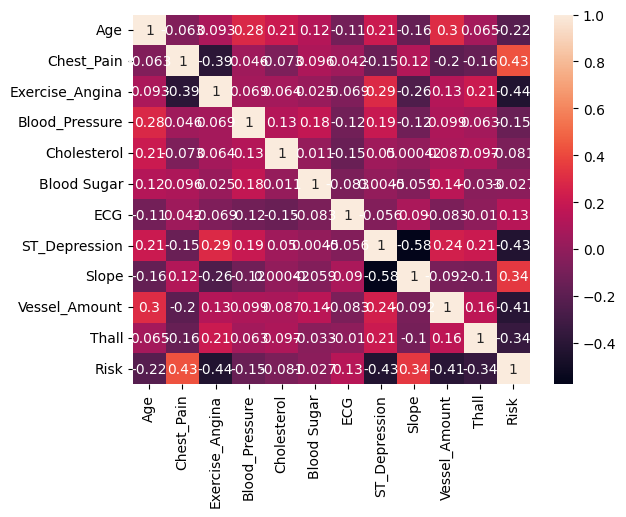

In [ ]:
old_corr = cutold_df.corr()
sb.heatmap(old_corr, annot=True)

When searching online, I found a "rule of thumb" that stated that multicollinearity exists with correlations over 0.8, meaning that my data does not display multicollinearity.

After all of this work, we can now safely construct our logistic regression models.

### Original Argument Regression Model

In [ ]:
m1 = smf.logit(formula = 'Risk ~ Age', data=cutold_df).fit()
m1.summary()

Optimization terminated successfully.
         Current function value: 0.664330
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                 0.03642
Time:                        18:20:20   Log-Likelihood:                -200.63
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 9.853e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9876      0.759      3.936      0.000       1.500       4.475
Age           -0.0515      0.014     -3.770      0.000      -0.078      -0.025
==============================================================================
"""

We can see that for the original argument (age causes heart health risk), there is a miniscule R-Squared value (represented as a pseudo R-squared value), only 0.03642. This proves that the original argument was not as strong as it was framed to be.

### Proposed Argument Regression Model

In [ ]:
m2 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar)', data=cutold_df).fit()
m2.summary()

Optimization terminated successfully.
         Current function value: 0.676230
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                 0.01878
Time:                        18:21:34   Log-Likelihood:                -204.90
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                   0.04938
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9538      1.027      2.877      0.004       0.942       4.966
C(Blood_Sugar)[T.1]    -0.0174      0.333     -0.052      0.958      -0.670       0.635
Cholesterol            -0.0027      0.002     -1.189      0.234      -0.007       0.002
Blood_Pressure         -0.0160      0.007     -2.292      0.022      -0.030      -0.002
=======================================================================================
"""

Wow, that's not much better. I will need to add more variables to increase the R-squared value (there are more "causes" than just Cholesterol, Blood Pressure, and Blood Sugar).

In [ ]:
m3 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar) + C(ECG)', data=cutold_df).fit()
m3.summary()

Optimization terminated successfully.
         Current function value: 0.664164
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                 0.03629
Time:                        18:22:36   Log-Likelihood:                -201.24
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                  0.009722
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1831      1.081      2.020      0.043       0.065       4.301
C(Blood_Sugar)[T.1]     0.0065      0.338      0.019      0.985      -0.656       0.669
C(ECG)[T.1]             0.5992      0.242      2.476      0.013       0.125       1.074
C(ECG)[T.2]            -0.8800      1.181     -0.745      0.456      -3.195       1.435
Cholesterol            -0.0018      0.002     -0.771      0.441      -0.006       0.003
Blood_Pressure         -0.0140      0.007     -1.974      0.048      -0.028   -9.78e-05
=======================================================================================
"""

In [ ]:
m4 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar) + C(ECG) + C(Vessel_Amount) + C(Chest_Pain)', data=cutold_df).fit()
m4.summary()

Optimization terminated successfully.
         Current function value: 0.442682
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.3577
Time:                        18:23:03   Log-Likelihood:                -134.13
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.601e-26
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2761      1.378      1.652      0.099      -0.425       4.977
C(Blood_Sugar)[T.1]       0.0707      0.448      0.158      0.875      -0.807       0.948
C(ECG)[T.1]               0.4217      0.316      1.333      0.183      -0.198       1.042
C(ECG)[T.2]              -0.6224      1.658     -0.375      0.707      -3.872       2.627
C(Vessel_Amount)[T.1]    -2.0335      0.384     -5.297      0.000      -2.786      -1.281
C(Vessel_Amount)[T.2]    -2.1795      0.517     -4.215      0.000      -3.193      -1.166
C(Vessel_Amount)[T.3]    -2.7212      0.745     -3.652      0.000      -4.182      -1.261
C(Vessel_Amount)[T.4]    -0.1873      1.324     -0.142      0.887      -2.781       2.407
C(Chest_Pain)[T.1]        2.3870      0.483      4.937      0.000       1.439       3.335
C(Chest_Pain)[T.2]        2.3656      0.389      6.086      0.000       1.604       3.127
C(Chest_Pain)[T.3]        1.9683      0.578      3.402      0.001       0.834       3.102
Cholesterol               0.0008      0.003      0.234      0.815      -0.006       0.007
Blood_Pressure           -0.0209      0.009     -2.242      0.025      -0.039      -0.003
=========================================================================================
"""

In [ ]:
m5 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar) + C(ECG) + C(Vessel_Amount) + C(Chest_Pain) + ST_Depression', data=cutold_df).fit()
m5.summary()

Optimization terminated successfully.
         Current function value: 0.394749
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.4272
Time:                        18:23:34   Log-Likelihood:                -119.61
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 3.564e-31
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.9070      1.485      1.958      0.050      -0.003       5.817
C(Blood_Sugar)[T.1]      -0.0051      0.475     -0.011      0.991      -0.937       0.927
C(ECG)[T.1]               0.4502      0.338      1.333      0.183      -0.212       1.112
C(ECG)[T.2]               0.3593      2.389      0.150      0.880      -4.323       5.042
C(Vessel_Amount)[T.1]    -2.1911      0.411     -5.331      0.000      -2.997      -1.386
C(Vessel_Amount)[T.2]    -1.9986      0.570     -3.508      0.000      -3.115      -0.882
C(Vessel_Amount)[T.3]    -2.6190      0.781     -3.355      0.001      -4.149      -1.089
C(Vessel_Amount)[T.4]    -0.9184      1.347     -0.682      0.495      -3.558       1.721
C(Chest_Pain)[T.1]        1.8826      0.492      3.830      0.000       0.919       2.846
C(Chest_Pain)[T.2]        2.4928      0.431      5.778      0.000       1.647       3.338
C(Chest_Pain)[T.3]        2.4566      0.629      3.905      0.000       1.223       3.690
Cholesterol               0.0006      0.003      0.186      0.852      -0.006       0.007
Blood_Pressure           -0.0189      0.010     -1.898      0.058      -0.038       0.001
ST_Depression            -0.9115      0.187     -4.869      0.000      -1.278      -0.545
=========================================================================================
"""

In [ ]:
m6 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar) + C(ECG) + C(Vessel_Amount) + C(Chest_Pain) + ST_Depression + Thall', data=cutold_df).fit()
m6.summary()

Optimization terminated successfully.
         Current function value: 0.369886
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           14
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.4633
Time:                        18:24:05   Log-Likelihood:                -112.08
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.171e-33
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.2007      1.672      3.110      0.002       1.923       8.478
C(Blood_Sugar)[T.1]      -0.1808      0.512     -0.353      0.724      -1.184       0.823
C(ECG)[T.1]               0.4929      0.350      1.409      0.159      -0.193       1.178
C(ECG)[T.2]               0.1281      2.478      0.052      0.959      -4.730       4.986
C(Vessel_Amount)[T.1]    -2.1552      0.427     -5.044      0.000      -2.993      -1.318
C(Vessel_Amount)[T.2]    -2.0921      0.599     -3.495      0.000      -3.265      -0.919
C(Vessel_Amount)[T.3]    -2.5465      0.857     -2.971      0.003      -4.227      -0.866
C(Vessel_Amount)[T.4]    -0.3551      1.499     -0.237      0.813      -3.292       2.582
C(Chest_Pain)[T.1]        1.6635      0.500      3.330      0.001       0.684       2.643
C(Chest_Pain)[T.2]        2.4881      0.457      5.446      0.000       1.593       3.383
C(Chest_Pain)[T.3]        2.4590      0.631      3.900      0.000       1.223       3.695
Cholesterol               0.0011      0.003      0.327      0.743      -0.006       0.008
Blood_Pressure           -0.0181      0.010     -1.793      0.073      -0.038       0.002
ST_Depression            -0.9125      0.201     -4.544      0.000      -1.306      -0.519
Thall                    -1.0901      0.292     -3.728      0.000      -1.663      -0.517
=========================================================================================
"""

In [ ]:
m7 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar) + C(ECG) + C(Vessel_Amount) + C(Chest_Pain) + ST_Depression + Thall + C(Slope)', data=cutold_df).fit()
m7.summary()

Optimization terminated successfully.
         Current function value: 0.349731
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           16
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.4925
Time:                        18:24:31   Log-Likelihood:                -105.97
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 5.570e-35
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.1605      1.831      2.819      0.005       1.573       8.748
C(Blood_Sugar)[T.1]      -0.1542      0.533     -0.290      0.772      -1.198       0.890
C(ECG)[T.1]               0.3932      0.360      1.092      0.275      -0.313       1.099
C(ECG)[T.2]               0.2681      2.125      0.126      0.900      -3.896       4.432
C(Vessel_Amount)[T.1]    -2.2813      0.450     -5.067      0.000      -3.164      -1.399
C(Vessel_Amount)[T.2]    -2.4894      0.661     -3.767      0.000      -3.785      -1.194
C(Vessel_Amount)[T.3]    -2.6046      0.879     -2.964      0.003      -4.327      -0.882
C(Vessel_Amount)[T.4]     0.3003      1.602      0.187      0.851      -2.839       3.440
C(Chest_Pain)[T.1]        1.5569      0.516      3.015      0.003       0.545       2.569
C(Chest_Pain)[T.2]        2.4855      0.467      5.318      0.000       1.569       3.402
C(Chest_Pain)[T.3]        2.5176      0.651      3.864      0.000       1.241       3.795
C(Slope)[T.1]            -0.6412      0.795     -0.806      0.420      -2.200       0.918
C(Slope)[T.2]             0.7213      0.859      0.839      0.401      -0.963       2.405
Cholesterol               0.0016      0.004      0.453      0.651      -0.005       0.008
Blood_Pressure           -0.0192      0.010     -1.876      0.061      -0.039       0.001
ST_Depression            -0.6701      0.224     -2.998      0.003      -1.108      -0.232
Thall                    -1.1228      0.297     -3.784      0.000      -1.704      -0.541
=========================================================================================
"""

In [ ]:
m8 = smf.logit(formula = 'Risk ~ Cholesterol + Blood_Pressure + C(Blood_Sugar) + C(ECG) + C(Vessel_Amount) + C(Chest_Pain) + ST_Depression + Thall + C(Slope) + C(Exercise_Angina)', data=cutold_df).fit()
m8.summary()

Optimization terminated successfully.
         Current function value: 0.340532
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  303
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           17
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.5059
Time:                        18:43:58   Log-Likelihood:                -103.18
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.532e-35
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.2603      1.859      2.830      0.005       1.617       8.903
C(Blood_Sugar)[T.1]        -0.0421      0.541     -0.078      0.938      -1.103       1.019
C(ECG)[T.1]                 0.4051      0.366      1.107      0.269      -0.312       1.123
C(ECG)[T.2]                 0.1169      2.132      0.055      0.956      -4.062       4.296
C(Vessel_Amount)[T.1]      -2.2234      0.457     -4.865      0.000      -3.119      -1.328
C(Vessel_Amount)[T.2]      -2.6430      0.673     -3.927      0.000      -3.962      -1.324
C(Vessel_Amount)[T.3]      -2.5317      0.864     -2.932      0.003      -4.224      -0.839
C(Vessel_Amount)[T.4]       0.4105      1.715      0.239      0.811      -2.951       3.772
C(Chest_Pain)[T.1]          1.2742      0.537      2.371      0.018       0.221       2.328
C(Chest_Pain)[T.2]          2.1417      0.483      4.437      0.000       1.196       3.088
C(Chest_Pain)[T.3]          2.2218      0.660      3.367      0.001       0.929       3.515
C(Slope)[T.1]              -0.6747      0.818     -0.825      0.409      -2.277       0.928
C(Slope)[T.2]               0.6001      0.890      0.674      0.500      -1.144       2.344
C(Exercise_Angina)[T.1]    -0.9624      0.407     -2.367      0.018      -1.759      -0.165
Cholesterol                 0.0018      0.004      0.490      0.624      -0.005       0.009
Blood_Pressure             -0.0170      0.010     -1.657      0.098      -0.037       0.003
ST_Depression              -0.6365      0.232     -2.740      0.006      -1.092      -0.181
Thall                      -1.1030      0.300     -3.682      0.000      -1.690      -0.516
===========================================================================================
"""

After the creation of the eight logistic regression model, we have improved the R-Squared value of the original argument by more than 0.4, a LARGE improvement.

## 8. Try an easy solution
*In this case, I will be comparing the explanatory power of both models. My assessment metrics are R^2 value and Regression Coefficients*

### Comparing the Models
**R^2 Value:** My proposed argument has an R^Squared value of 0.5059, an increase of more than 0.4 than the article's original argument. This provides solid evidence that my proposed argument is a much more reasonable causation! <br>
**Regression Coefficients:** The original argument had only one coefficient, Age. While it was statistically significant, it lacked the scope that my proposed regression coefficients offer. In my model, I had 5 independent variables that were all statistically significant.
<br> <br>
**My Findings:** As my EDA and above explanation have shown, there is evidence that my proposed argument of a multitude of alternative causes for heart health risk (Cholesterol, Blood Pressure, Blood Sugar, etc.) is more likely than simply age. It is from this evidence that I again propose a "Mediation" situation in which Age is the initial cause followed by various other causes that *actually* increase heart health risk.



# 5. Discuss

### Differences in Predictor Variables
My proposed argument introduces many more predictor variables than the article's original argument. In the article, "age" is stated as the cause of heart health risks. I countered that argument with many other potential causes, such as Cholesterol, Blood Pressure, and Blood Sugar. <br>
Obviously, the original argument only had one predictor variable, "age". This regression model was extremely weak, with an R-Squared Value of only 0.03. <br>
My proposed argument had 10 predictor variables, all of which are listed in the above logistic regression model. These new variables increased the R-Squared value by nearly 0.4, a huge increase in terms of R-Squared values.

### Statistically Significant Predictor Variables
The original argument's only predictor variable, "age", was statistically significant. While my proposed argument introduced 10 new predictor variables, only 5 of them were statistically significant: Thall, ST Depression, Exercise Angina, Chest Pain, and Vessel Amount. This dampens the overall change that my proposed argument causes, but 5 new statistically significant predictor variables is still a *massive* change between regression models.

### Difference in Predictor Variables' Effects
In the original argument, the predictor variable "age" had a coefficient of -0.05, meaning that for every one unit change in Age, the log-odds of the Risk being 1 decreased by 0.05. While this makes little sense on its own, removing "Age" from the other variables in the dataset causes issues. This is the root of my argument that age on its own is not a viable cause for heart health risks. <br> <br>
In my proposed argument, the statistically significant predictor variable coefficients are below
- Thall had a coefficient of -1.1030
- ST_Depression was -0.6365
- Exercise Angina was -0.9624
- Chest Pain value of 1 was 1.2742
- Chest Pain value of 2 was 2.1417
- Chest Pain value of 3 was 2.2218
- Vessel Amount value of 1 was -2.2234
- Vessel Amount value of 2 was -2.6430
- Vessel Amount value of 3 was -2.5317

Most of these variables makes sense. I'm not sure what Thall means in this situation, but a one-unit change in ST Depression decreased the log odds of heart risk by -0.6. Again, I'm not really sure what ST Depression means in this situation. However, for every unit change in Chest Pain, the log odds of heart Risk increased by 1.2, 2.1, and 2.2. This is a very noticeable effect. Similarily, for each unit change in number of major vessels block, the log odds of Heart Health Risk decreased by -2.2, -2.6, and -2.5.

### Aspects of my causal mechanism that are important in comparison to the original explanation
In my best understanding, the only aspects of my causal mechanism that are important in comparison to the original explanation are the improved R^2 value and the Chest Pain coefficients. None of the other statistically significant coefficients make much sense in the context of heart health risk. I cannot understand why an increase in blocked blood vessels would decrease the risk of heart health issues. However, each increase in Chest Pain directly increases heart health risk by a significant amount.


## Reflection
### Reflection on Unintended Consequences of Causal Claims in the Health Article

In my chosen health article, a claim is made that old age causes an increase in heart health risks. Through my regression models and EDA, I found that the original claim was overconfident and lacked other important causes for heart health. This can lead to unintended consequences, such as a reader's belief that age is the *only* cause of heart health risk. From this information, they could assume that other important factors, such as physical health, are entirely unrelated and not important. This could cause them to ignore important aspects of their health and increase the risk for heart health issues.

### Reflection on Unintended Consequences of Causal Claims in Another Example

With a simple Google search, I found an example of a census model that predicts crime by area and neighborhood reinforcing racist beliefs. Due to the model receiving a large amount of police activity in neighborhoods that were primarily African American (as many police officers mistakenly believed that crime was more likely to occur there), it predicted that in the future, more crime will occur in these areas. From this fact, more police officers were deployed in these certain neighborhoods, which would then increase the model's belief that these neighborhoods had an irrational amount of crime. From this model's predictions, incorrect racist beliefs were reinforced, a harmful unintended consequence of the model's causal claims.